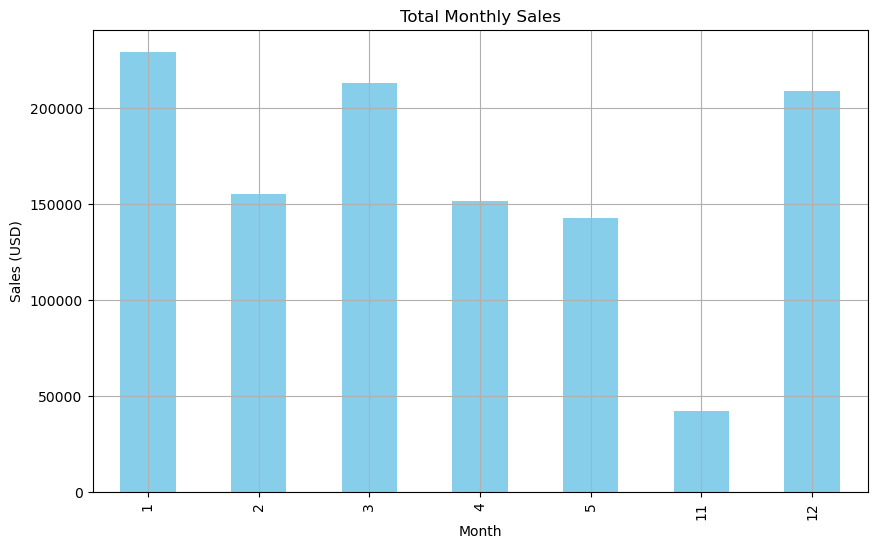

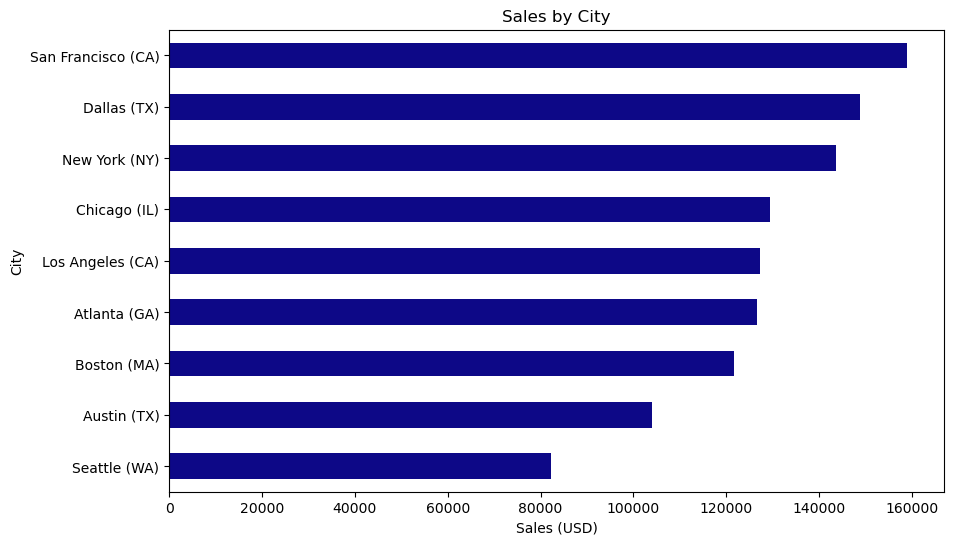

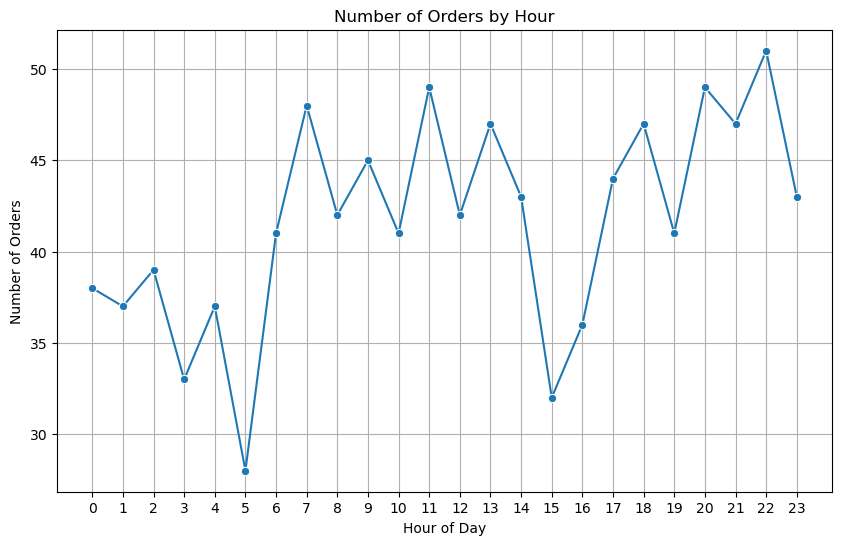

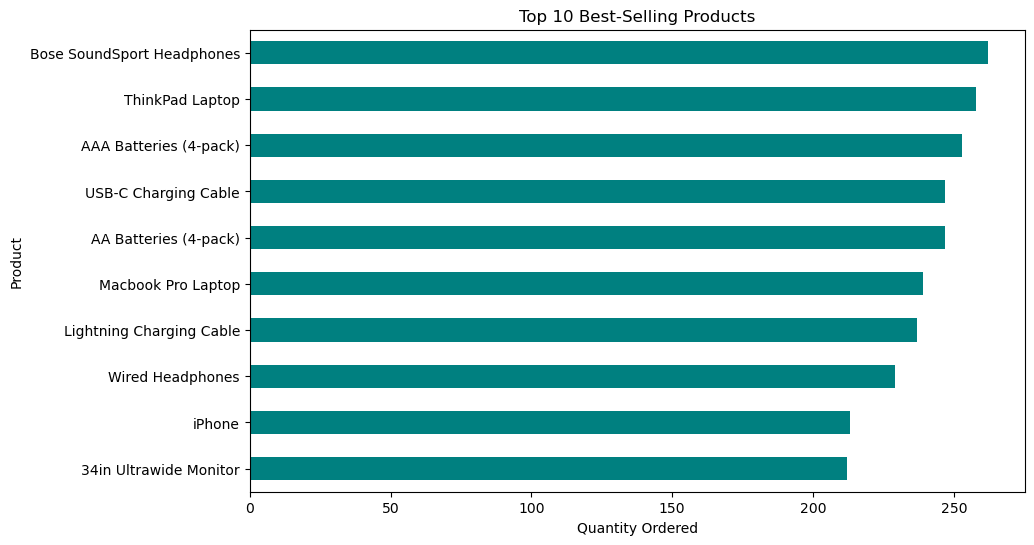

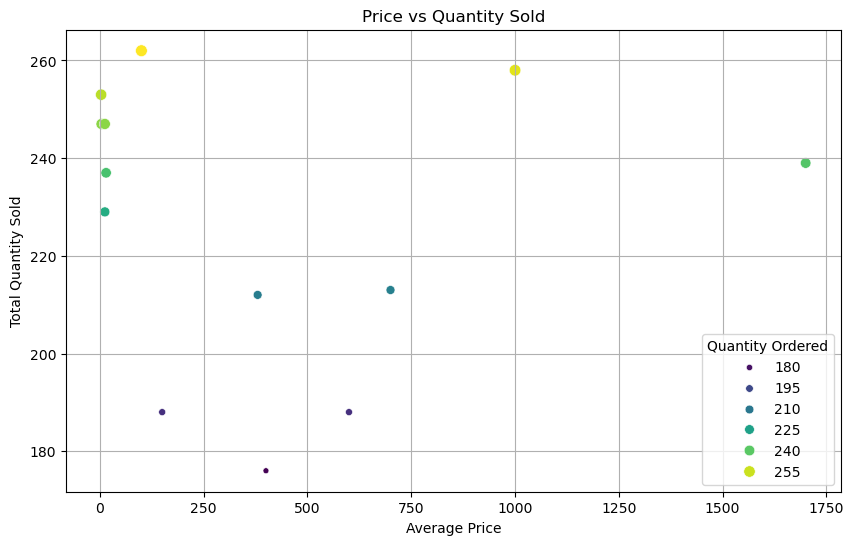

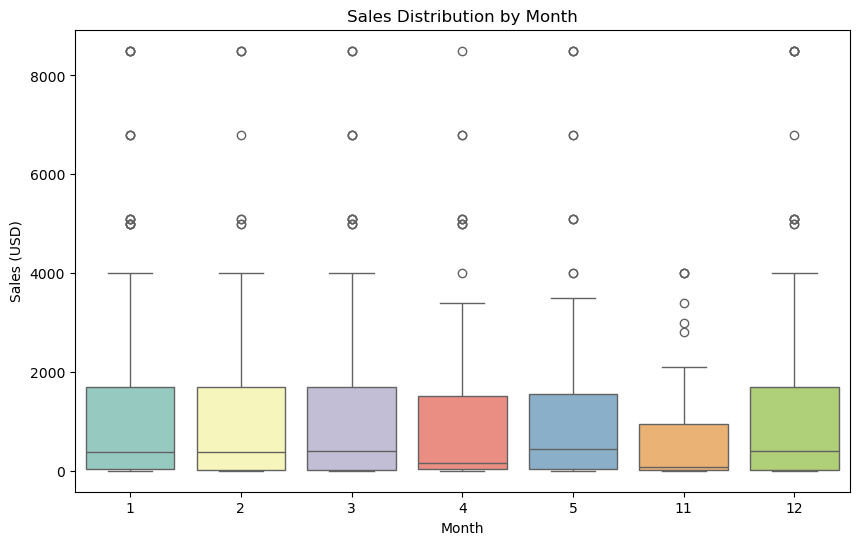

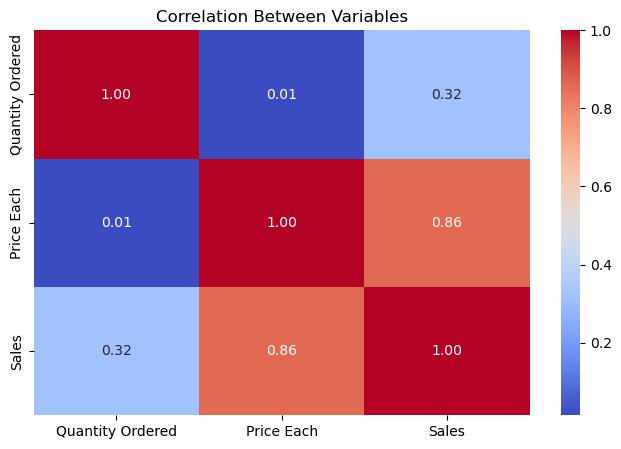

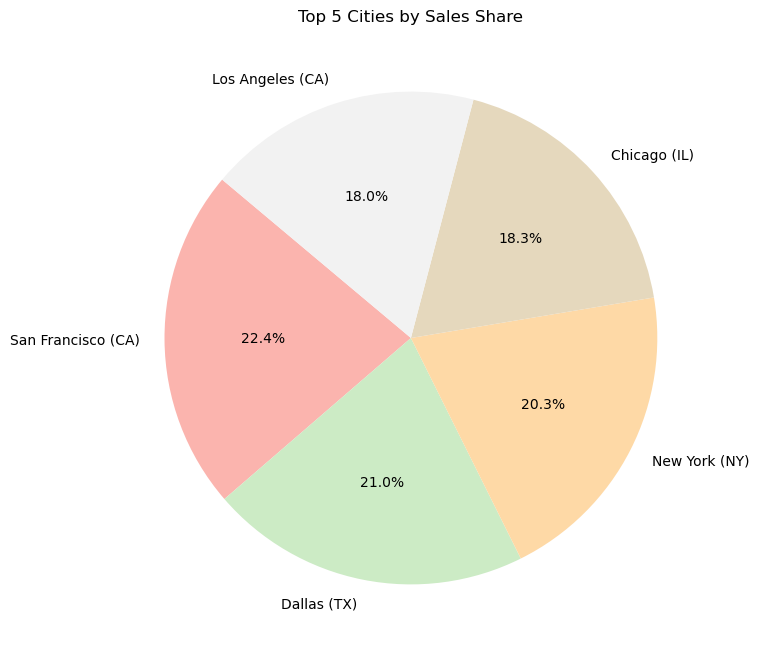

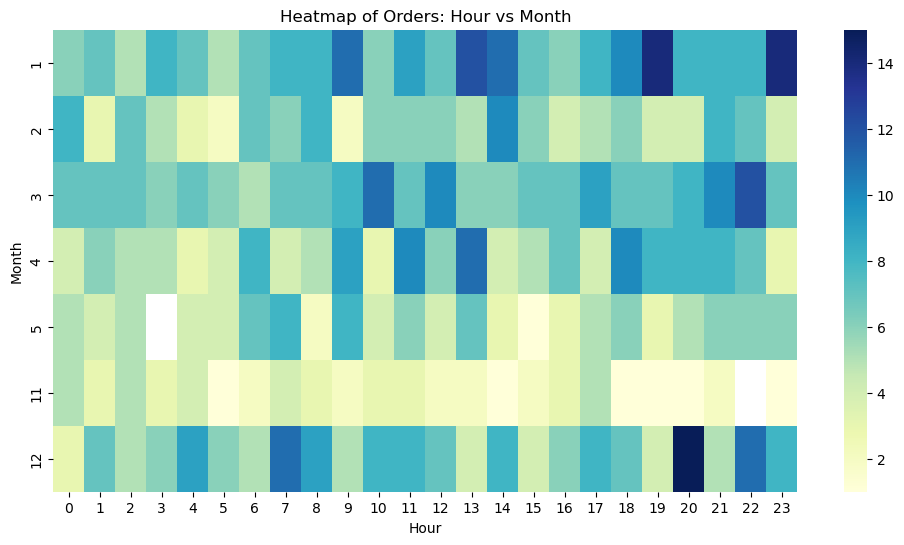

In [3]:
# eCommerce Sales Analysis Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

# Load dataset
df = pd.read_csv('ecommerce_sales_data.csv')

# Clean dataset
df.dropna(inplace=True)
df = df[df['Order Date'].str[0:2] != 'Or']  # remove header repeats

# Convert columns to correct types
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Feature Engineering
df['Month'] = df['Order Date'].dt.month
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['City'] = df['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].split()[0]})")
df['Hour'] = df['Order Date'].dt.hour

# 1. Monthly Sales
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.grid(True)
plt.show()

# 2. Sales by City
city_sales = df.groupby('City')['Sales'].sum().sort_values()
city_sales.plot(kind='barh', cmap='plasma', figsize=(10,6))
plt.title('Sales by City')
plt.xlabel('Sales (USD)')
plt.ylabel('City')
plt.show()

# 3. Sales by Hour
hourly_sales = df.groupby('Hour')['Order ID'].count()
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.xticks(range(0, 24))
plt.title('Number of Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# 4. Top 10 Best-Selling Products
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True).tail(10)
top_products.plot(kind='barh', color='teal', figsize=(10, 6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()

# 5. Price vs Quantity Sold
product_data = df.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each':'mean'})
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price Each', y='Quantity Ordered', data=product_data, hue='Quantity Ordered', palette='viridis', size='Quantity Ordered')
plt.title('Price vs Quantity Sold')
plt.xlabel('Average Price')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

# 6. Sales Distribution by Month (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=df, palette='Set3')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.show()

# 7. Correlation Heatmap
corr = df[['Quantity Ordered', 'Price Each', 'Sales']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

# 8. Pie Chart of Sales by Top 5 Cities
top_cities = df.groupby('City')['Sales'].sum().nlargest(5)
plt.figure(figsize=(8, 8))
top_cities.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Top 5 Cities by Sales Share')
plt.ylabel('')
plt.show()

# 9. Heatmap of Orders by Month and Hour
heatmap_data = df.groupby(['Month', 'Hour'])['Order ID'].count().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Heatmap of Orders: Hour vs Month')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()
